# **CreditScored**

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import time
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, log_loss, cohen_kappa_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

## **Loading Training & Testing**

In [4]:
url_train='train_data.csv'
url_test='test_data.csv'
train=pd.read_csv(url_train,sep=',')
test=pd.read_csv(url_test,sep=',')
print(train.shape)
print(test.shape)

(29165, 20)
(7292, 20)


## **Data Exploration**

In [5]:
train.head()

ID Gender Has a car Has a property  Children count    Income  \
0  5037048      M         Y              Y               0  135000.0   
1  5044630      F         Y              N               1  135000.0   
2  5079079      F         N              Y               2  180000.0   
3  5112872      F         Y              Y               0  360000.0   
4  5105858      F         N              N               0  270000.0   

      Employment status                Education level        Marital status  \
0               Working  Secondary / secondary special               Married   
1  Commercial associate               Higher education  Single / not married   
2  Commercial associate  Secondary / secondary special               Married   
3  Commercial associate               Higher education  Single / not married   
4               Working  Secondary / secondary special             Separated   

            Dwelling    Age  Employment length  Has a mobile phone  \
0       With parents -16271              -3111                   1   
1  House / apartment -10130              -1651                   1   
2  House / apartment -12821              -5657                   1   
3  House / apartment -20929              -2046                   1   
4  House / apartment -16207               -515                   1   

   Has a work phone  Has a phone  Has an email    Job title  \
0                 0            0             0   Core staff   
1                 0            0             0  Accountants   
2                 0            0             0     Laborers   
3                 0            0             1     Managers   
4                 0            1             0          NaN   

   Family member count  Account age  Is high risk  
0                  2.0        -17.0             0  
1                  2.0         -1.0             0  
2                  4.0        -38.0             0  
3                  1.0        -11.0             0  
4                  1.0        -41.0             0

In [6]:
test.head()

ID Gender Has a car Has a property  Children count    Income  \
0  5091261      F         N              Y               0  202500.0   
1  5096963      M         Y              N               0  675000.0   
2  5087880      F         N              N               0  234000.0   
3  5021949      F         Y              Y               0  445500.0   
4  5105705      F         Y              N               0  225000.0   

      Employment status                Education level  Marital status  \
0         State servant  Secondary / secondary special       Separated   
1  Commercial associate               Higher education         Married   
2         State servant               Higher education  Civil marriage   
3  Commercial associate               Higher education         Married   
4               Working  Secondary / secondary special         Married   

              Dwelling    Age  Employment length  Has a mobile phone  \
0    House / apartment -16834              -1692                   1   
1    House / apartment -18126               -948                   1   
2    House / apartment -21967              -5215                   1   
3    House / apartment -12477               -456                   1   
4  Municipal apartment -12155               -667                   1   

   Has a work phone  Has a phone  Has an email       Job title  \
0                 0            0             0  Medicine staff   
1                 0            1             0        Managers   
2                 0            0             1      Core staff   
3                 0            0             0        Managers   
4                 0            0             0        Laborers   

   Family member count  Account age  Is high risk  
0                  1.0         -6.0             0  
1                  2.0        -16.0             0  
2                  2.0        -52.0             0  
3                  2.0        -54.0             0  
4                  2.0        -48.0             0

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

In [9]:
train.nunique()

ID                     29165
Gender                     2
Has a car                  2
Has a property             2
Children count             9
Income                   259
Employment status          5
Education level            5
Marital status             5
Dwelling                   6
Age                     6794
Employment length       3483
Has a mobile phone         1
Has a work phone           2
Has a phone                2
Has an email               2
Job title                 18
Family member count       10
Account age               61
Is high risk               2
dtype: int64

In [10]:
print(train.isnull().sum())

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64


In [11]:
print(test.isnull().sum())

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              2296
Family member count       0
Account age               0
Is high risk              0
dtype: int64


In [12]:
train = train.drop(columns=['Job title'])
test=test.drop(columns=['Job title'])

## **Data Visualization**

In [13]:
train.nunique()

ID                     29165
Gender                     2
Has a car                  2
Has a property             2
Children count             9
Income                   259
Employment status          5
Education level            5
Marital status             5
Dwelling                   6
Age                     6794
Employment length       3483
Has a mobile phone         1
Has a work phone           2
Has a phone                2
Has an email               2
Family member count       10
Account age               61
Is high risk               2
dtype: int64

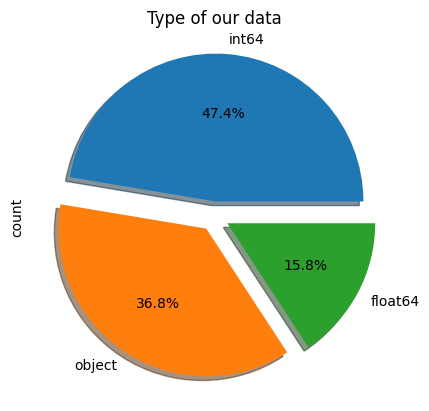

In [14]:
#grafico muy importante
train.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Type of our data')
plt.show()

**Analizar a las columnas numericas**

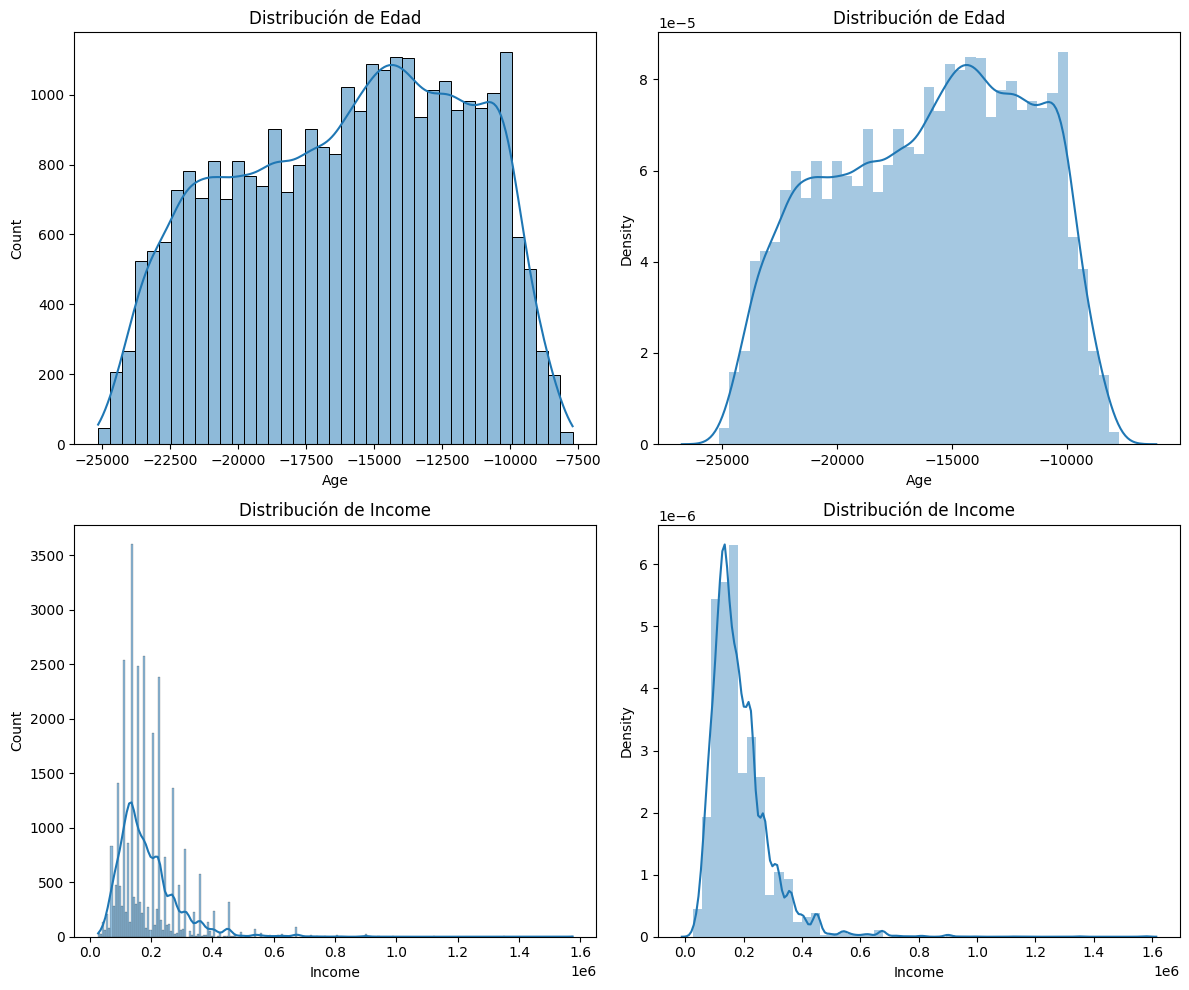

In [15]:
#train.nunique()
num=['Income','Age','Employment length']
# Crear una figura y un conjunto de subgráficos con una cuadrícula de 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Graficar cada gráfico en una ubicación específica de la cuadrícula
sns.histplot(data=train, x='Age', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Edad')

sns.distplot(train['Age'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Edad')

sns.histplot(data=train, x='Income', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Income')

sns.distplot(train['Income'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Income')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [16]:
train[['Income', 'Age', 'Account age']].describe()

Income           Age   Account age
count  2.916500e+04  29165.000000  29165.000000
mean   1.868904e+05 -15979.477490    -26.137734
std    1.014096e+05   4202.997485     16.486702
min    2.700000e+04 -25152.000000    -60.000000
25%    1.215000e+05 -19444.000000    -39.000000
50%    1.575000e+05 -15565.000000    -24.000000
75%    2.250000e+05 -12475.000000    -12.000000
max    1.575000e+06  -7705.000000      0.000000

In [17]:
fig = px.scatter_matrix(train[['Income', 'Age', 'Account age', 'Is high risk']], 
                          dimensions=['Income', 'Age', 'Account age'], 
                          color='Is high risk')
fig.update_layout(title='Pairplot of Select Features', width=800,  height=700)
fig.show()

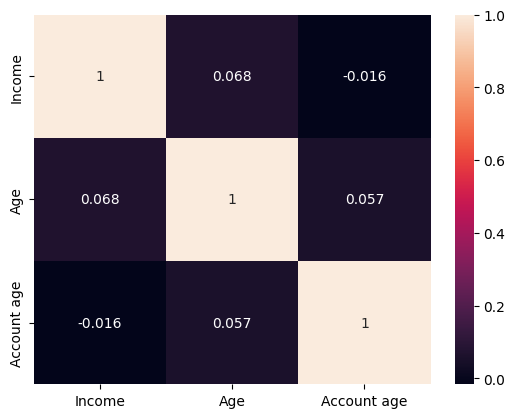

In [18]:
sns.heatmap(train[['Income', 'Age', 'Account age']].corr(),annot=True)
plt.show()

**Analizar a las columnas categoricas**

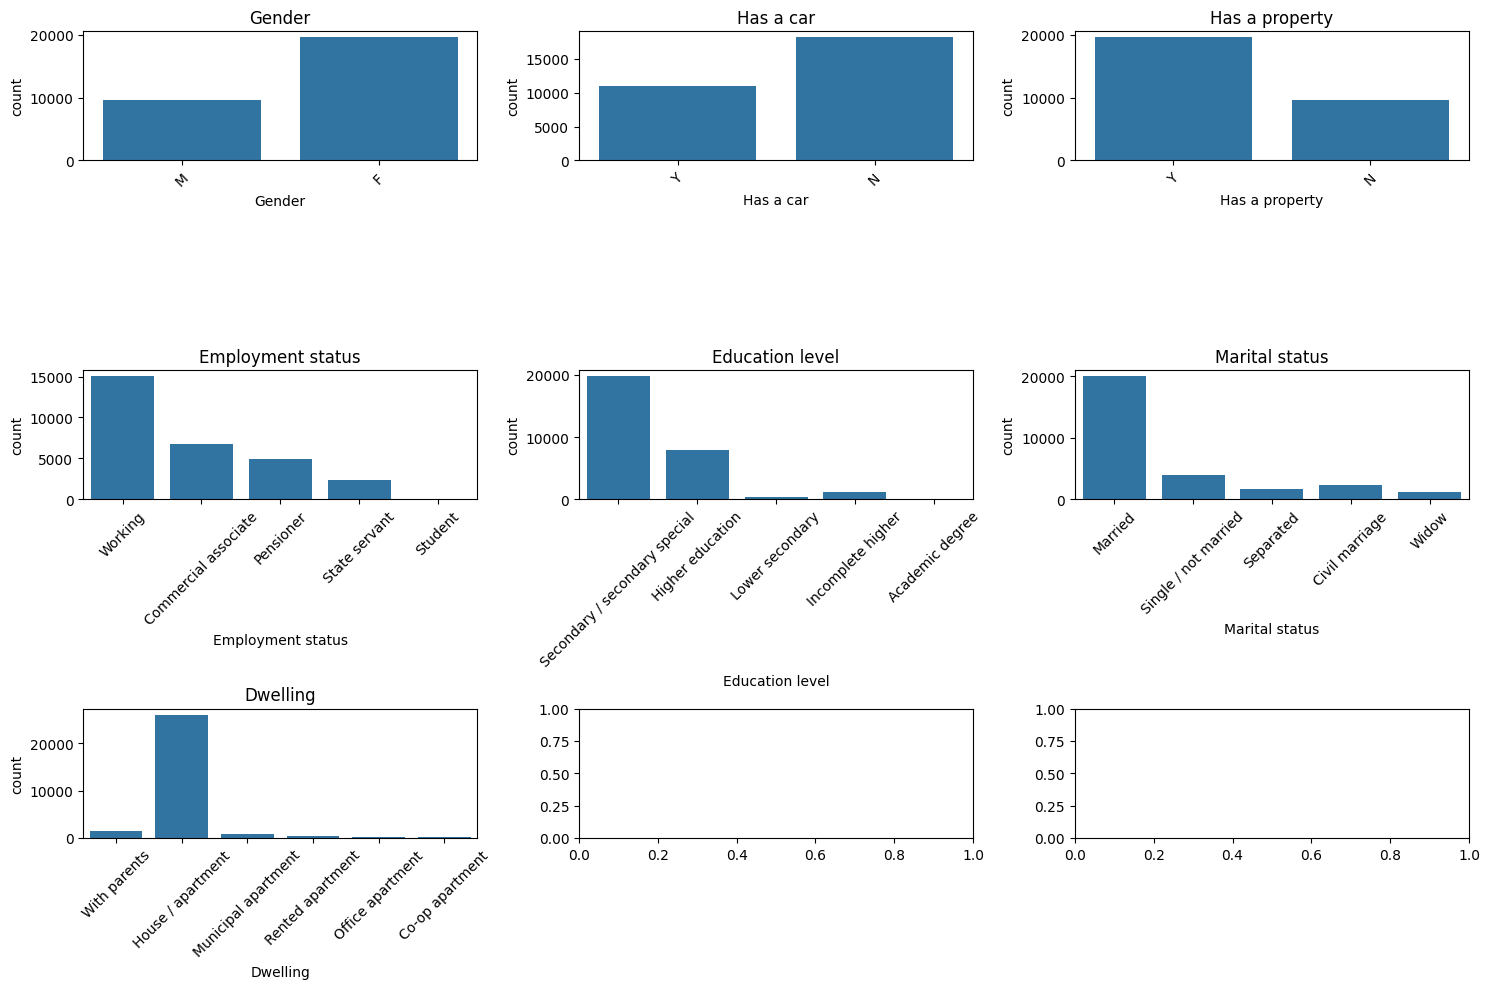

In [19]:
# Obtener las columnas de tipo 'object'
cat_columns = train.select_dtypes(include='object').columns

# Calcular el número total de gráficos a trazar
total_plots = len(cat_columns)

# Calcular el número de filas y columnas necesarias
num_rows = (total_plots + 2) // 3  # Redondear hacia arriba
num_cols = 3

# Crear una figura y un conjunto de subgráficos con la cuadrícula especificada
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Aplanar los ejes si solo hay una fila de subgráficos
if num_rows == 1:
    axes = [axes]

# Trazar cada gráfico en una ubicación específica de la cuadrícula
for idx, column in enumerate(cat_columns):
    row = idx // num_cols
    col = idx % num_cols
    sns.countplot(data=train, x=column, ax=axes[row][col])
    axes[row][col].set_title(column)
    axes[row][col].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


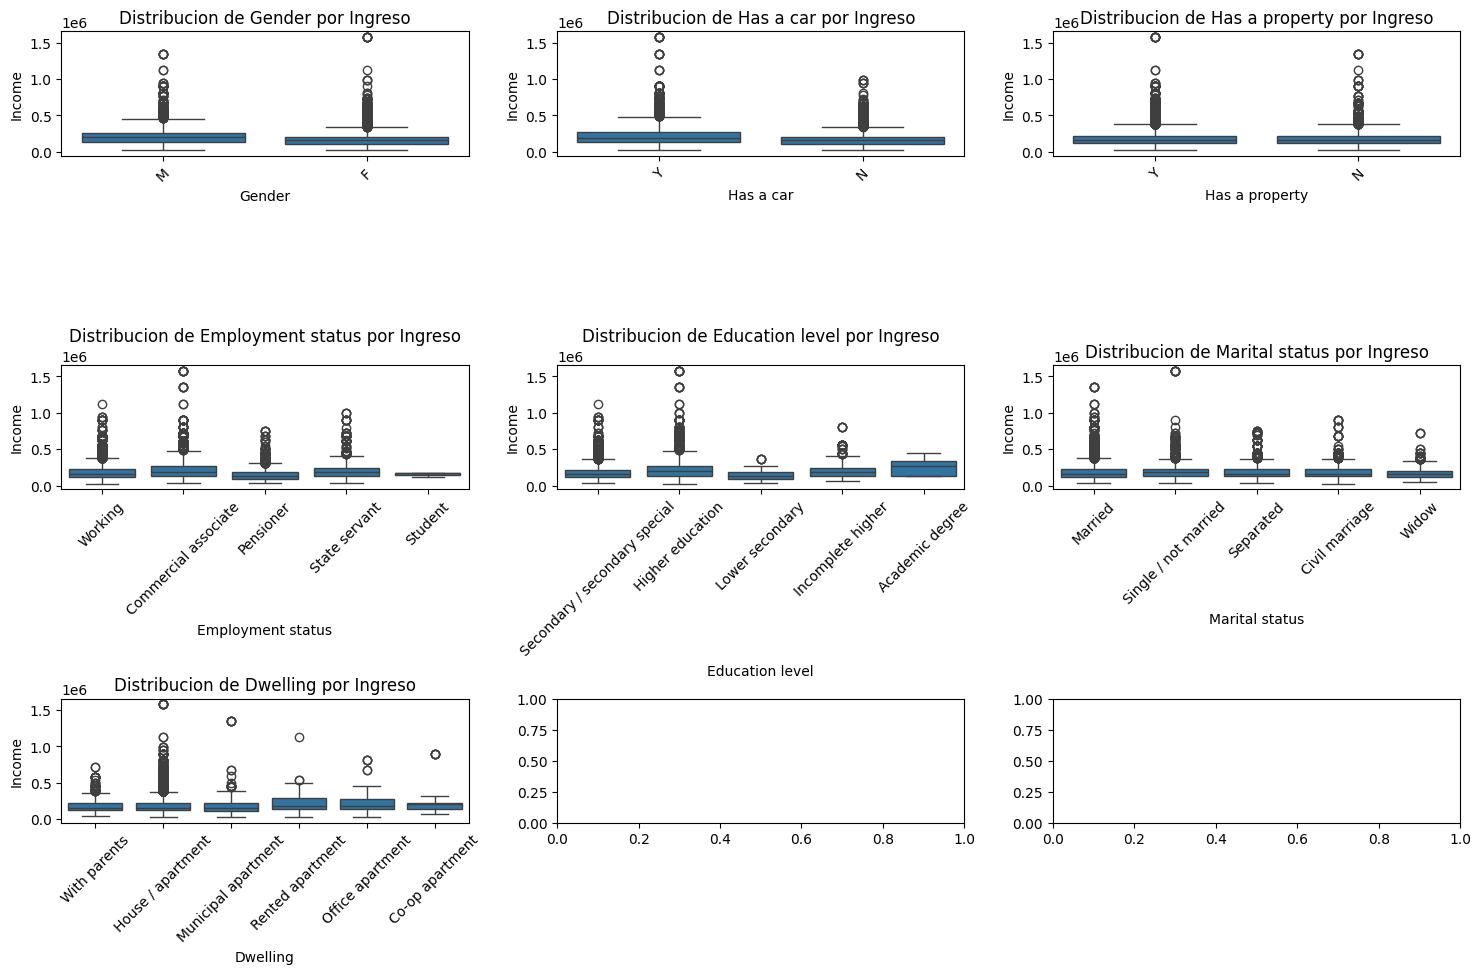

In [20]:
# Crear una figura y un conjunto de subgráficos con la cuadrícula especificada
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Aplanar los ejes si solo hay una fila de subgráficos
if num_rows == 1:
    axes = [axes]

# Trazar cada gráfico en una ubicación específica de la cuadrícula
for idx, column in enumerate(cat_columns):
    row = idx // num_cols
    col = idx % num_cols
    sns.boxplot(data=train, x=column, y='Income', ax=axes[row][col])
    axes[row][col].set_title(f'Distribucion de {column} por Ingreso')
    axes[row][col].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

## **Data Preparation**

In [21]:
label_encoder=LabelEncoder()
columns_to_encode=['Gender', 'Has a car', 'Has a property', 'Employment status', 
                     'Education level', 'Marital status', 'Dwelling', 'Family member count']

for column in columns_to_encode:
    train[column]=label_encoder.fit_transform(train[column])
train.head()

ID  Gender  Has a car  Has a property  Children count    Income  \
0  5037048       1          1               1               0  135000.0   
1  5044630       0          1               0               1  135000.0   
2  5079079       0          0               1               2  180000.0   
3  5112872       0          1               1               0  360000.0   
4  5105858       0          0               0               0  270000.0   

   Employment status  Education level  Marital status  Dwelling    Age  \
0                  4                4               1         5 -16271   
1                  0                1               3         1 -10130   
2                  0                4               1         1 -12821   
3                  0                1               3         1 -20929   
4                  4                4               2         1 -16207   

   Employment length  Has a mobile phone  Has a work phone  Has a phone  \
0              -3111                   1                 0            0   
1              -1651                   1                 0            0   
2              -5657                   1                 0            0   
3              -2046                   1                 0            0   
4               -515                   1                 0            1   

   Has an email  Family member count  Account age  Is high risk  
0             0                    1        -17.0             0  
1             0                    1         -1.0             0  
2             0                    3        -38.0             0  
3             1                    0        -11.0             0  
4             0                    0        -41.0             0

<function matplotlib.pyplot.show(close=None, block=None)>

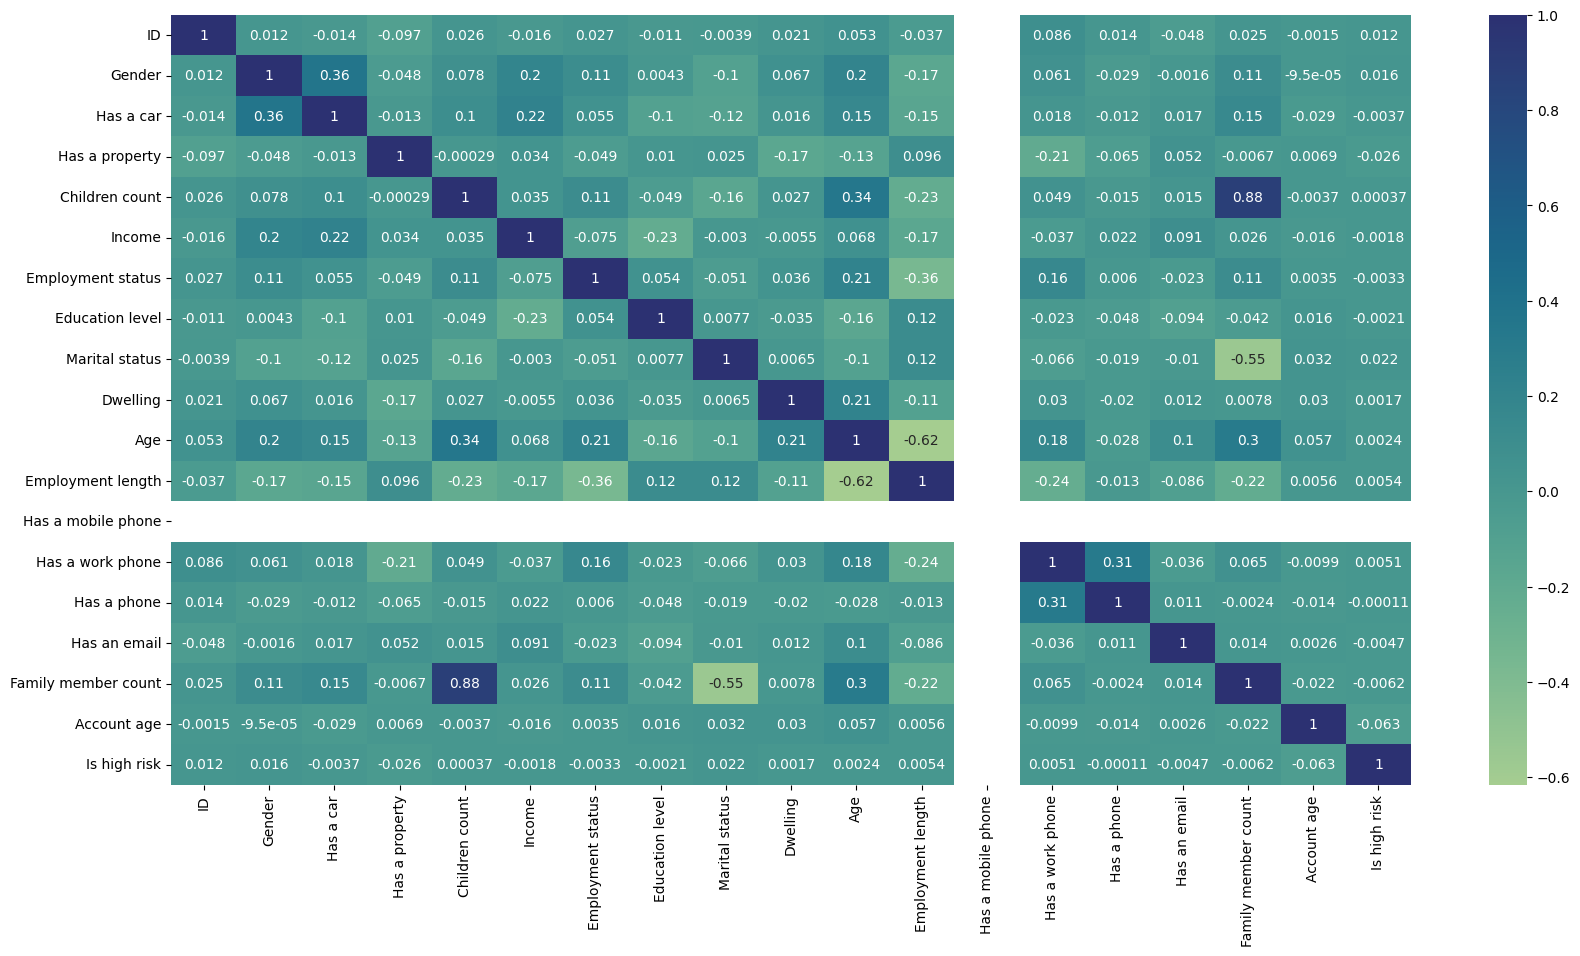

In [22]:
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(), cmap = 'crest', annot = True)
plt.show

In [23]:
#train=train.drop(columns=['Has a mobile phone'])
#train=train.drop(columns=['ID'])
#train=train.drop(columns=['Family member count'])
#train=train.drop(columns=['Age'])

<function matplotlib.pyplot.show(close=None, block=None)>

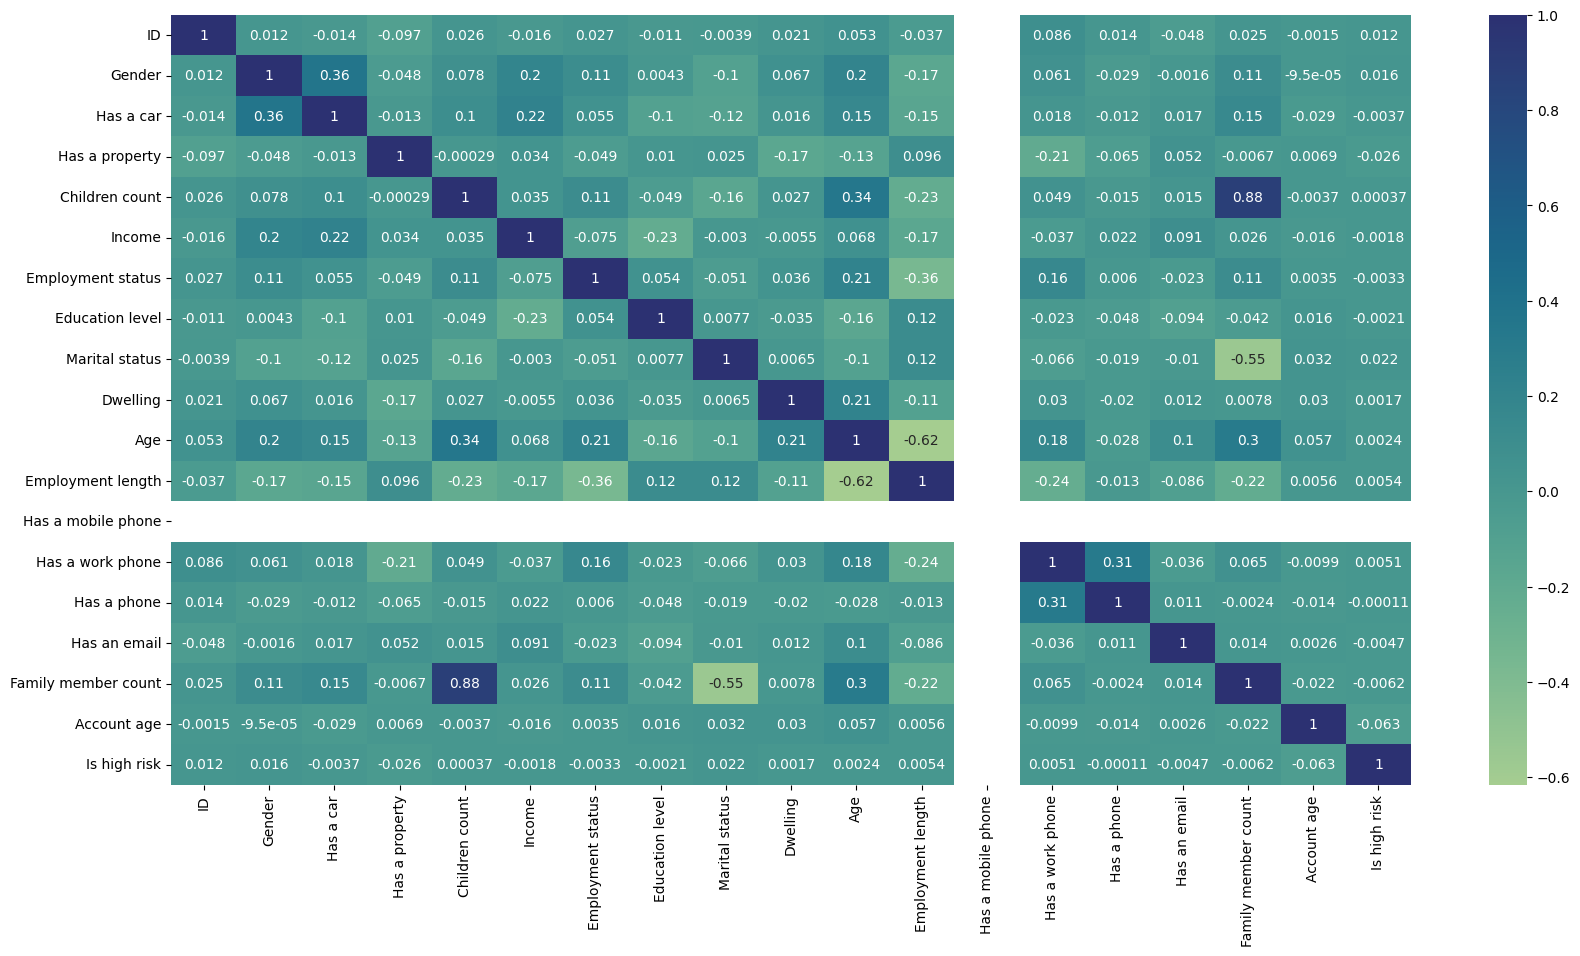

In [24]:
plt.figure(figsize = (20,10))
sns.heatmap(train.corr(), cmap = 'crest', annot = True)
plt.show

In [25]:
import plotly.express as px

# Crear el mapa de calor con Plotly Express
fig = px.imshow(train.corr(), 
                color_continuous_scale='viridis',  # Cambia 'viridis' por cualquier escala de colores predefinida que desees utilizar
                labels=dict(x="Variables", y="Variables", color="Correlación"),
                x=train.columns,
                y=train.columns,
                title='Matriz de correlación')

# Mostrar el mapa de calor
fig.show()



## **Model Machine Learning**

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# defining the features and target
X = train.drop(['Is high risk'],axis=1)
y = train[['Is high risk']]

In [28]:
fig1 = px.histogram(train, x='Is high risk', title='Distribution of High Risk Individuals')
fig1.update_layout(xaxis_title='Is High Risk', yaxis_title='Count', width=600, height=500)
fig1.show()

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 10)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [30]:
y_resampled['Is high risk'].value_counts()

Is high risk
0    28666
1    28666
Name: count, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=len(test), random_state= 10)

In [32]:
y_train['Is high risk'].value_counts()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('Shape for training data', X_train.shape, y_train.shape)
print('Shape for testing data', X_test.shape, y_test.shape)

Shape for training data (50040, 18) (50040, 1)
Shape for testing data (7292, 18) (7292, 1)


## **Logistic Regression**

In [146]:
# Define los hiperparámetros para la regresión logística
params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2','elasticnet',None], 'solver': ['liblinear', 'lbfgs','newton-cg'],
          'class_weight':['dict','balanced',None],'max_iter':[10,50,100]}
# Inicializa el modelo de regresión logística
lr = LogisticRegression()
# Inicializa la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(lr, params, cv=5)
# Ajusta la búsqueda de cuadrícula al conjunto de entrenamiento
grid_search.fit(X_train, y_train)
# Los mejores hiperparámetros encontrados
print(grid_search.best_params_)

{'C': 10, 'class_weight': None, 'max_iter': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [147]:

# Inicializa el modelo de regresión logística con los mejores parámetros
lr = LogisticRegression(**grid_search.best_params_)
# Ajusta el modelo a los datos de entrenamiento
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score : 72.07 %


In [148]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,jaccard_score,log_loss
def calculate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred,average='micro')
    prec = precision_score(y_true, y_pred,average='micro')
    rec = recall_score(y_true, y_pred,average='micro')
    jacc=jaccard_score(y_true,y_pred,average='micro')
    log=log_loss(y_true,y_pred)
    return {'Accuracy': acc, 'F1 Score': f1, 'Precision': prec, 'Recall': rec,'Jaccard':jacc,'Log':log}
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.7206527701590785,
 'F1 Score': 0.7206527701590785,
 'Precision': 0.7206527701590785,
 'Recall': 0.7206527701590785,
 'Jaccard': 0.5632972451495337,
 'Log': 10.06869472759622}

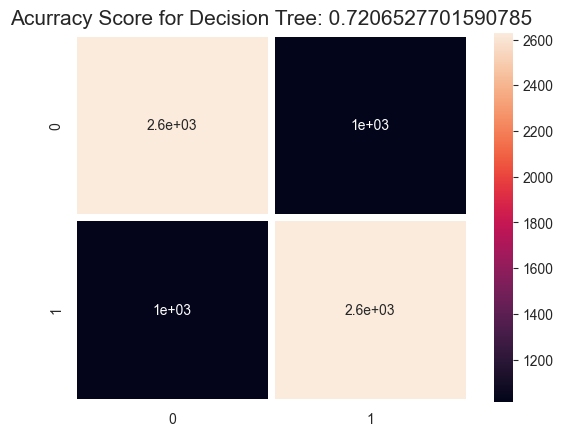

In [149]:
def matrix(model):
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Decision Tree: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(lr)

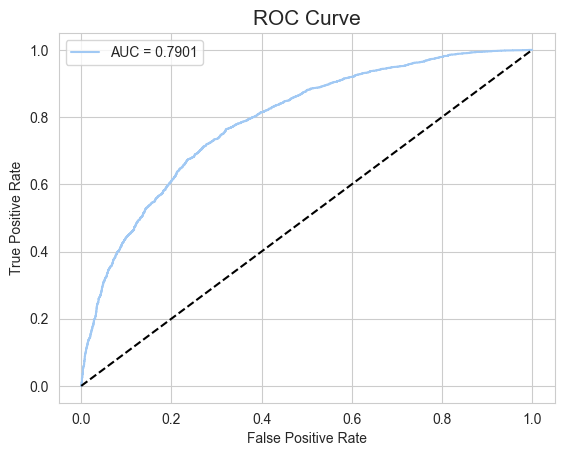

In [150]:
def roc_model(model):
  from sklearn.metrics import roc_curve, roc_auc_score
  y_pred_proba=model.predict_proba(X_test)[:][:,1]
  df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
  df_actual_predicted.index = y_test.index
  fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
  auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

  plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
  plt.plot(fpr, fpr, linestyle = '--', color='k')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve', size = 15)
  plt.legend()

roc_model(lr)

## **RandomForest Classifier**

In [35]:
params={'n_estimators':[10,50,100],
        'max_depth':[5,10,15,20],
        'criterion':['gini','entropy','log_loss'],
        'n_jobs':[1,2,4],
        'verbose':[True],
        'class_weight':['equilibrado','balanced_subsample']  
}
rf=RandomForestClassifier()
grid_search=GridSearchCV(rf,params,cv=5)
# Ajusta la búsqueda de cuadrícula al conjunto de entrenamiento
grid_search.fit(X_train, y_train)
# Los mejores hiperparámetros encontrados
print(grid_search.best_params_)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]

{'class_weight': 'balanced_subsample', 'criterion': 'log_loss', 'max_depth': 20, 'n_estimators': 100, 'n_jobs': 2, 'verbose': True}


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   16.6s finished


In [36]:
# Inicializa el modelo de random Forest Classifier con los mejores parámetros
rf = RandomForestClassifier(**grid_search.best_params_)
# Ajusta el modelo a los datos de entrenamiento
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.5s


Accuracy Score : 98.33 %


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   14.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,jaccard_score,log_loss
def calculate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred,average='micro')
    prec = precision_score(y_true, y_pred,average='micro')
    rec = recall_score(y_true, y_pred,average='micro')
    jacc=jaccard_score(y_true,y_pred,average='micro')
    log=log_loss(y_true,y_pred)
    return {'Accuracy': acc, 'F1 Score': f1, 'Precision': prec, 'Recall': rec,'Jaccard':jacc,'Log':log}
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.9832693362589139,
 'F1 Score': 0.9832693362589139,
 'Precision': 0.9832693362589139,
 'Recall': 0.9832693362589139,
 'Jaccard': 0.967089290531427,
 'Log': 0.6030342448535784}

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


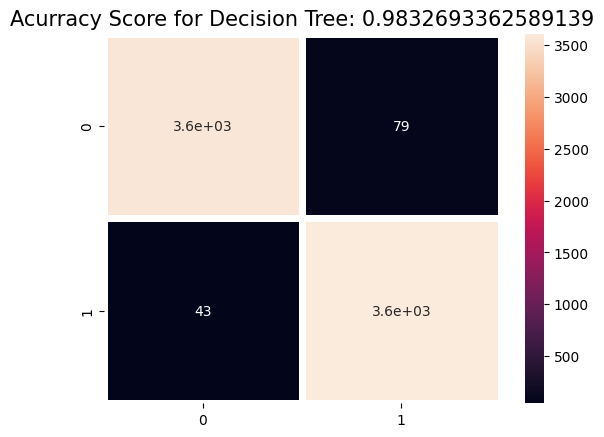

In [38]:
def matrix(model):
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Decision Tree: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(rf)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


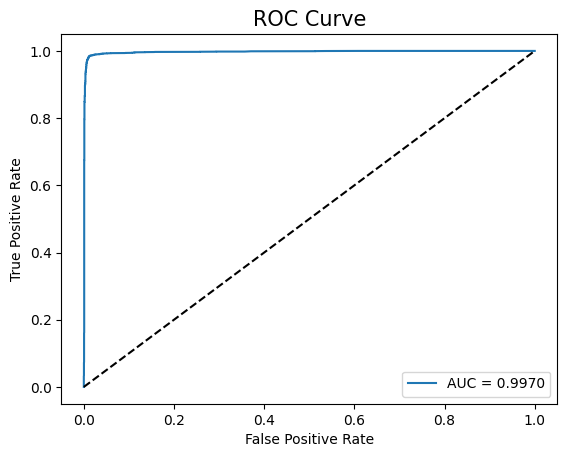

In [39]:
def roc_model(model):
  from sklearn.metrics import roc_curve, roc_auc_score
  y_pred_proba=model.predict_proba(X_test)[:][:,1]
  df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
  df_actual_predicted.index = y_test.index
  fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
  auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

  plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
  plt.plot(fpr, fpr, linestyle = '--', color='k')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve', size = 15)
  plt.legend()

roc_model(rf)

**Verificar si el modelo es ajustable**

In [42]:
# Predicciones
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
# Exactitud
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [43]:
def interpretar_resultados(train_accuracy, test_accuracy, threshold=0.05):
    """
    Interpreta los resultados de un modelo de machine learning en función de las precisiones del conjunto de entrenamiento y de prueba.

    :param train_accuracy: Precisión del conjunto de entrenamiento.
    :param test_accuracy: Precisión del conjunto de prueba.
    :param threshold: Umbral para determinar una diferencia significativa entre las precisiones de entrenamiento y prueba.
    :return: Una cadena que indica si el modelo está sobreajustado, subajustado o bien ajustado.
    """
    if train_accuracy > 0.8 and test_accuracy > 0.8:
        if abs(train_accuracy - test_accuracy) < threshold:
            return "Buen ajuste: La precisión es alta y similar en ambos conjuntos."
        else:
            return "Overfitting: La precisión del conjunto de entrenamiento es mucho mayor que la precisión del conjunto de prueba."
    else:
        return "Underfitting: La precisión es baja tanto en el conjunto de entrenamiento como en el de prueba."

resultado = interpretar_resultados(train_accuracy, test_accuracy)
print(resultado)


Buen ajuste: La precisión es alta y similar en ambos conjuntos.


## **KNN CLASSIFIER**

In [48]:
params={'n_neighbors':[2,5,10],
        'weights':['uniform','distance','callable'],
        'metric':['nan_euclidean','callable']
}
kn=KNeighborsClassifier()
grid_search=GridSearchCV(kn,params,cv=5)
# Ajusta la búsqueda de cuadrícula al conjunto de entrenamiento
grid_search.fit(X_train, y_train)
# Los mejores hiperparámetros encontrados
print(grid_search.best_params_)

{'metric': 'nan_euclidean', 'n_neighbors': 2, 'weights': 'distance'}


In [49]:
# Inicializa el modelo de random Forest Classifier con los mejores parámetros
kn = KNeighborsClassifier(**grid_search.best_params_)
# Ajusta el modelo a los datos de entrenamiento
kn.fit(X_train, y_train)
y_pred=rf.predict(X_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s


Accuracy Score : 98.33 %


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,jaccard_score,log_loss
def calculate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred,average='micro')
    prec = precision_score(y_true, y_pred,average='micro')
    rec = recall_score(y_true, y_pred,average='micro')
    jacc=jaccard_score(y_true,y_pred,average='micro')
    log=log_loss(y_true,y_pred)
    return {'Accuracy': acc, 'F1 Score': f1, 'Precision': prec, 'Recall': rec,'Jaccard':jacc,'Log':log}
calculate_metrics(y_test,y_pred)

{'Accuracy': 0.9832693362589139,
 'F1 Score': 0.9832693362589139,
 'Precision': 0.9832693362589139,
 'Recall': 0.9832693362589139,
 'Jaccard': 0.967089290531427,
 'Log': 0.6030342448535784}

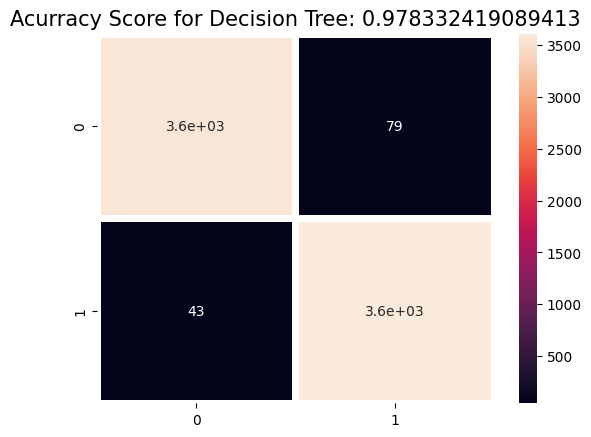

In [51]:
def matrix(model):
  from sklearn.metrics import confusion_matrix
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(data=cm,linewidths=5,annot=True)
  all_sample_title='Acurracy Score for Decision Tree: {0}'.format(model.score(X_test,y_test))
  plt.title(all_sample_title,size=15)
  plt.show()

matrix(kn)

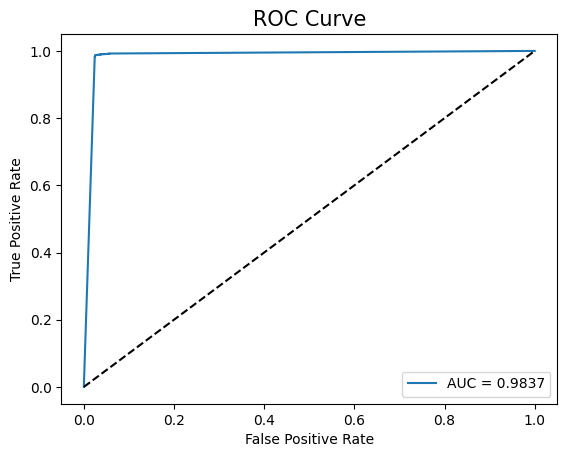

In [52]:
def roc_model(model):
  from sklearn.metrics import roc_curve, roc_auc_score
  y_pred_proba=model.predict_proba(X_test)[:][:,1]
  df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
  df_actual_predicted.index = y_test.index
  fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
  auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

  plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
  plt.plot(fpr, fpr, linestyle = '--', color='k')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve', size = 15)
  plt.legend()

roc_model(kn)

In [53]:
# Predicciones
y_train_pred = kn.predict(X_train)
y_test_pred = kn.predict(X_test)
# Exactitud
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [55]:
def interpretar_resultados(train_accuracy, test_accuracy, threshold=0.05):
    """
    Interpreta los resultados de un modelo de machine learning en función de las precisiones del conjunto de entrenamiento y de prueba.

    :param train_accuracy: Precisión del conjunto de entrenamiento.
    :param test_accuracy: Precisión del conjunto de prueba.
    :param threshold: Umbral para determinar una diferencia significativa entre las precisiones de entrenamiento y prueba.
    :return: Una cadena que indica si el modelo está sobreajustado, subajustado o bien ajustado.
    """
    if train_accuracy > 0.8 and test_accuracy > 0.8:
        if abs(train_accuracy - test_accuracy) < threshold:
            return "Buen ajuste: La precisión es alta y similar en ambos conjuntos."
        else:
            return "Overfitting: La precisión del conjunto de entrenamiento es mucho mayor que la precisión del conjunto de prueba."
    else:
        return "Underfitting: La precisión es baja tanto en el conjunto de entrenamiento como en el de prueba."

resultado = interpretar_resultados(train_accuracy, test_accuracy)
print(resultado)

Buen ajuste: La precisión es alta y similar en ambos conjuntos.
